In [1]:
#combine differing depth files into one df with depth info associated
#save that for further reference
#make a heatmap with depth and nr. trees

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime

In [54]:
path = "Experiment2_min_samples/"#"Experiment_data2/" #path to the folder to work with
#"Experiment2_training_data/"
path_end = "diabetes" #that exact folder. Should have same name as the csv files in it end with


def get_total_df(path, path_end, change_name = "depth", from_train = False):
    """combines individual test CSV files into 1 big Dataframe"""
    total_df = pd.DataFrame()
    if from_train:
        full_path = path + path_end + "_training"
    else:
        full_path = path + path_end
    locs = os.listdir(full_path)
    
    for loc in locs:
        depth_str = loc[-len(path_end) - 7 :-len(path_end) - 5]
        
        try:
            depth = int(depth_str)
        except:
            depth = int(depth_str[-1])
#         depth = int(loc[-len(path_end) - 6]) #gets the depth, only 1 digit supported
#         if depth == 0:
#             depth = 10

        new_frame = pd.read_csv(full_path + '/' + loc, )
        new_frame[change_name] = depth
        new_frame.drop("Unnamed: 0", inplace = True, axis = 1)
        total_df = pd.concat([total_df,new_frame])
        
    return(total_df)
total_df = get_total_df(path, path_end, "min samples per leaf", True)
#total_df

,ac0,ac1,ac2,ac3,ac4,ac5,ac6,ac7,ac8,ac9,...,ll3,ll4,ll5,ll6,ll7,ll8,ll9,llmean,llvariance,min samples per leaf
0,0.994211,0.988423,0.986975,0.982634,0.979740,0.998553,0.986975,0.989870,0.986994,0.992775,...,-20.791304,-20.590980,-20.756467,-20.247658,-20.531579,-20.613619,-20.616499,-20.535968,0.405573,1
1,0.995658,0.991317,0.998553,0.995658,0.998553,0.995658,0.994211,0.997106,0.998555,0.998555,...,-18.571254,-18.468394,-18.589636,-18.317358,-18.308730,-18.235918,-18.596714,-18.384049,0.264327,1
2,1.000000,1.000000,1.000000,1.000000,0.995658,0.998553,1.000000,1.000000,0.997110,0.995665,...,-17.102134,-17.006690,-17.169490,-16.993615,-17.071043,-17.259809,-17.073807,-17.035501,0.361103,1
3,0.997106,1.000000,1.000000,1.000000,1.000000,1.000000,0.998553,1.000000,1.000000,1.000000,...,-16.611412,-16.274680,-16.665873,-16.338139,-16.468389,-16.406215,-16.287543,-16.406223,0.242965,1
4,1.000000,0.998553,1.000000,1.000000,1.000000,1.000000,0.997106,1.000000,1.000000,1.000000,...,-16.332979,-16.301413,-16.225560,-16.036782,-16.116117,-15.969142,-16.182185,-16.143819,0.194522,1
0,0.897250,0.888567,0.888567,0.911722,0.898698,0.910275,0.874096,0.879884,0.891618,0.884393,...,-25.457312,-25.217806,-25.276382,-25.116708,-25.168711,-25.277307,-24.919613,-25.226996,0.295309,5
1,0.936324,0.934877,0.916064,0.936324,0.918958,0.921852,0.924747,0.920405,0.919075,0.927746,...,-24.639598,-24.621565,-24.623978,-24.309593,-24.673956,-24.643507,-24.524010,-24.545599,0.124353,5
2,0.945007,0.955137,0.946454,0.963821,0.937771,0.943560,0.949349,0.949349,0.946532,0.936416,...,-24.321202,-24.234217,-24.232334,-23.978719,-24.247999,-24.247833,-24.371001,-24.205681,0.110077,5
3,0.956585,0.955137,0.971056,0.958032,0.958032,0.965268,0.959479,0.966715,0.950867,0.959538,...,-24.069123,-24.134056,-24.077601,-23.979193,-24.226595,-24.108138,-24.051074,-24.049059,0.083268,5
4,0.963821,0.955137,0.971056,0.963821,0.962373,0.972504,0.972504,0.972504,0.978324,0.962428,...,-23.891469,-23.836236,-24.031237,-23.802164,-23.762979,-24.019887,-23.878695,-23.901196,0.076241,5


In [62]:
def heat_map(df, title = "", column = "llmean", path = False):
    """
    Makes a heatmap with given column in the squares, 
    y axis values and x axis depth
    if path is given, saved in that location.
    """
    plot_df = df.groupby(['values', df.columns[-1]])[[column]].mean().unstack()
    fig, ax = plt.subplots(figsize = (10,5)) #default 15,15
    sns.heatmap(plot_df)
    ax.set_title(title)
    ax.set_ylabel("Number of Trees")
    if path:
        plt.savefig(path)
    else:
        plt.show()
    plt.close()

In [ ]:
path = "Experiment2_min_samples/"#"Experiment_data2/" #path to the folder to work with
#"Experiment2_training_data/"
path_end = "diabetes" #that exact folder. Should have same name as the csv files in it end with

col_name = "min samples per leaf"
from_training = True
total_df = get_total_df(path, path_end, col_name, from_training)

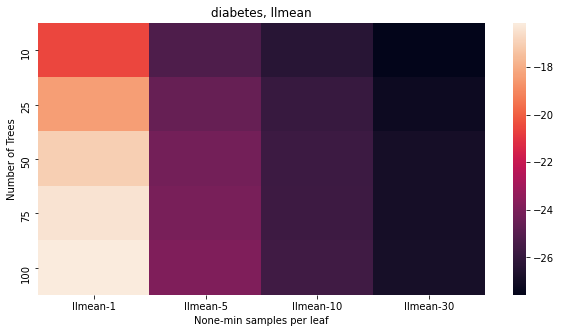

In [63]:
cur_moment = str(datetime.datetime.today())[0:19].replace(":", "_")
column = 'llmean'
path = f"../graphs/Experiment2_Heatmaps/{cur_moment}_{path_end}_{column}" #Experiment2_

plot_df = total_df#[total_df['depth'] > 3]


title = f"{path_end}, {column}"
heat_map(plot_df, title, column = column)#, path = path)

,ac1,ac2,ac3,acmean,values,ll1,ll2,ll3,llmean,depth
0,0.669456,0.794979,0.810669,0.758368,5,-99.610722,-99.419318,-99.422423,-99.484154,1
1,0.671548,0.805439,0.794979,0.757322,10,-99.555647,-99.378813,-99.441009,-99.458490,1
2,0.791841,0.779289,0.809623,0.793584,15,-99.370875,-99.379064,-99.432073,-99.394004,1
3,0.796025,0.792887,0.815900,0.801604,20,-99.352292,-99.429088,-99.474123,-99.418501,1
4,0.768828,0.803347,0.793933,0.788703,25,-99.428515,-99.421029,-99.371269,-99.406938,1


In [ ]:
#notes: For acmean depth has by far the most effect but stops having as much good effect at higher values for smaller datasets
#everything is super non-convex

#for llmean (what we are mostly interested in) seems more depth worse for dresses but better for electricity, interesting
#diabetes somewhere inbetween
#more trees always better it seems

In [24]:
#variance calculation and plot
# acs = ['ac' + str(i) for i in range(1,4)]
# lls = ['ll' + str(i) for i in range(1,4)]

# total_df['llvar'] =((total_df[lls[0]]-total_df['llmean'])**2 + 
#                     (total_df[lls[1]]-total_df['llmean'])**2 + 
#                     (total_df[lls[2]]-total_df['llmean'])**2) / 3
# total_df['acvar'] =((total_df[acs[0]]-total_df['acmean'])**2 + 
#                     (total_df[acs[1]]-total_df['acmean'])**2 + 
#                     (total_df[acs[2]]-total_df['acmean'])**2) / 3
# #total_df

,ac1,ac2,ac3,acmean,values,ll1,ll2,ll3,llmean,depth,llvar,acvar
0,0.670996,0.714286,0.688312,0.691198,5,-27.645815,-28.461589,-28.580230,-28.229211,5,0.172522,0.000317
1,0.744589,0.705628,0.705628,0.718615,10,-27.373191,-27.959185,-27.706212,-27.679530,5,0.057587,0.000337
2,0.692641,0.658009,0.696970,0.682540,15,-27.481935,-27.522899,-28.145253,-27.716696,5,0.092110,0.000304
3,0.701299,0.709957,0.705628,0.705628,20,-27.926492,-27.573365,-27.696629,-27.732162,5,0.021414,0.000012
4,0.740260,0.718615,0.714286,0.724387,25,-27.354251,-27.915064,-27.521424,-27.596913,5,0.055268,0.000129
...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.735931,0.766234,0.757576,0.753247,680,-29.767815,-29.719738,-29.723228,-29.736927,1,0.000479,0.000162
136,0.740260,0.744589,0.744589,0.743146,685,-29.752762,-29.308069,-29.762368,-29.607733,1,0.044915,0.000004
137,0.748918,0.740260,0.740260,0.743146,690,-29.738831,-29.771619,-29.724951,-29.745134,1,0.000383,0.000017
138,0.735931,0.744589,0.744589,0.741703,695,-29.102260,-29.736987,-29.728458,-29.522568,1,0.088342,0.000017


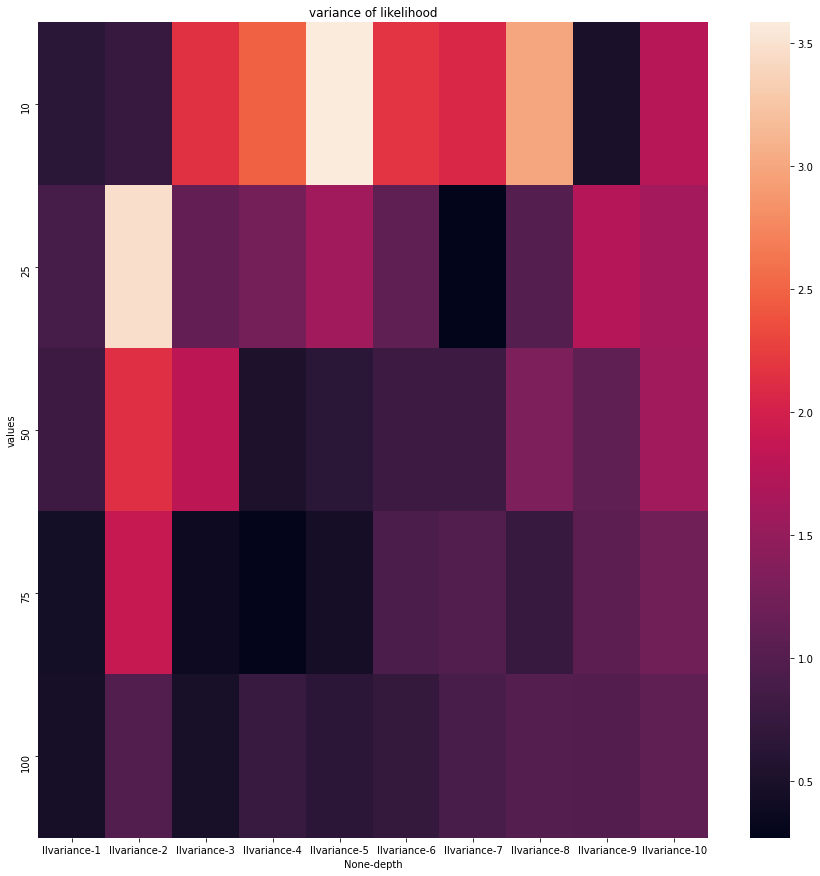

In [56]:
heat_map(total_df, 'variance of likelihood', 'llvariance')

<AxesSubplot:title={'center':'diabetes, one train set, depth 4 accuracy'}, xlabel='number of trees', ylabel='acmean'>

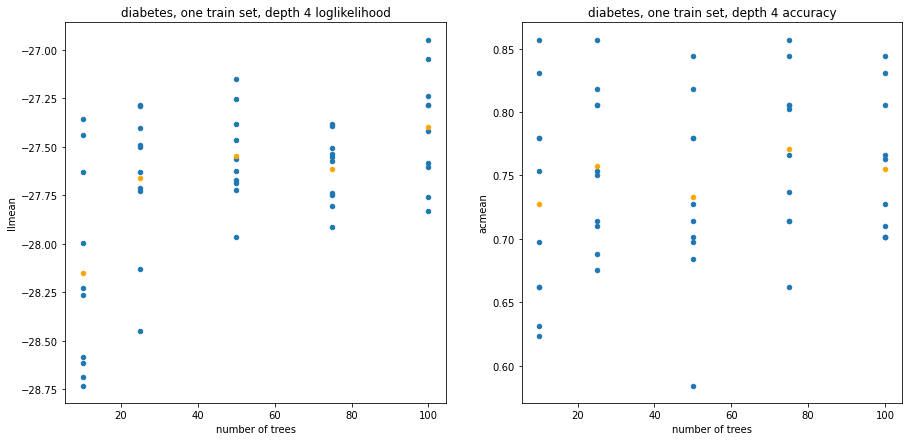

In [67]:
#making scatterplots of individual depths
lls = ["ll" + str(i) for i in range(10)]
depth = 4
tested = "number of trees"
fig, ax = plt.subplots(ncols = 2, figsize = (15, 7))
plot_df = total_df[total_df['depth'] == depth]

for ll in lls:
    
    plot_df.plot(kind = 'scatter', x = "values", y = ll, ax = ax[0])
plot_df.plot(kind = 'scatter', x = "values", y = "llmean", color = "orange", title = f"{path_end}, one train set, depth {depth} loglikelihood", xlabel = tested, ax = ax[0])
   
    
    
acs = ["ac" + str(i) for i in range(10)]

for ac in acs:
    
    plot_df.plot(kind = 'scatter', x = "values", y = ac, ax = ax[1])
plot_df.plot(kind = 'scatter', x = "values", y = "acmean", color = "orange", title = f"{path_end}, one train set, depth {depth} accuracy", xlabel = tested, ax = ax[1])

    

In [9]:
my_df = total_df[total_df['depth']== 2]
my_df[my_df['values'] <=200]['llmean'].mean(), my_df[my_df['values'] >=500]['llmean'].mean()

(-28.711741617493594, -28.499684604678066)

In [16]:
my_df[(my_df['values'] <=200) & (my_df['values'] >=100)]['llmean'].mean()

-28.559344853179503

<AxesSubplot:title={'center':'dresses, one train set, nr_trees 75'}, xlabel='depth', ylabel='acmean'>

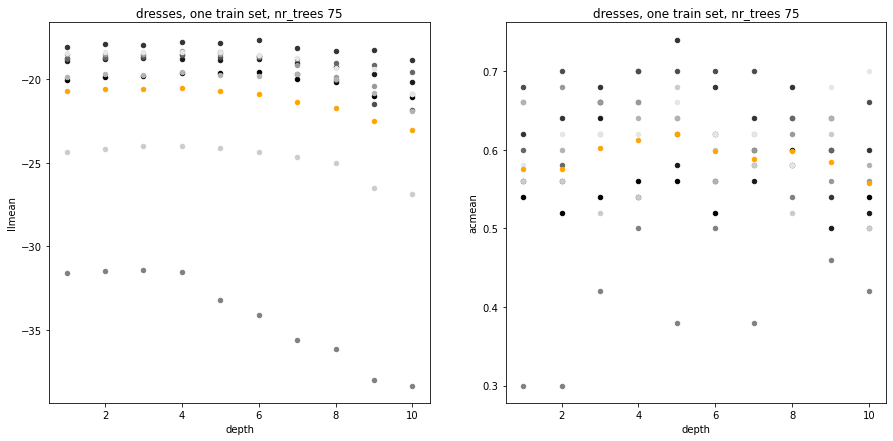

In [38]:
#lets try to plot across depth for set nr trees, to see if sliding over that will be possible

#filter dataset for one nr trees
nr_trees = 75
new_df = total_df[total_df['values'] == nr_trees]
#create scatterplots
lls = ["ll"+str(i) for i in range(10)]
acs = ["ac"+str(i) for i in range(10)]

clr_vals = [i/10 for i in range(10)]

tested = "depth"
fig, ax = plt.subplots(ncols = 2, figsize = (15, 7))
for i in range(len(lls)):
    j = lls[i]
    new_df.plot(kind = 'scatter', x = "depth", y = j, ax = ax[0], color = (clr_vals[i], clr_vals[i], clr_vals[i]))
new_df.plot(kind = 'scatter', x = "depth", y = "llmean", color = "orange", title = f"{path_end}, one train set, nr_trees {nr_trees}", xlabel = tested, ax = ax[0])
      
for i in range(len(acs)):
    j = acs[i]
    new_df.plot(kind = 'scatter', x = "depth", y = j, ax = ax[1], color = (clr_vals[i], clr_vals[i], clr_vals[i]))
new_df.plot(kind = 'scatter', x = "depth", y = "acmean", color = "orange", title = f"{path_end}, one train set, nr_trees {nr_trees}", xlabel = tested, ax = ax[1])


<AxesSubplot:xlabel='depth', ylabel='ll2'>

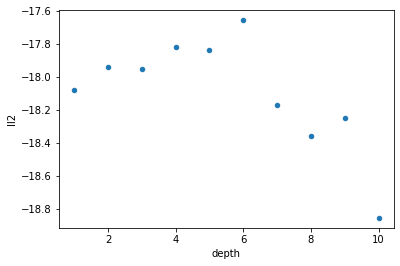

In [43]:
new_df.plot(kind = 'scatter', x = "depth", y = lls[2])

In [12]:
new_df

,ac0,ac1,ac2,ac3,ac4,ac5,ac6,ac7,ac8,ac9,...,ll3,ll4,ll5,ll6,ll7,ll8,ll9,llmean,llvariance,depth
0,0.54,0.56,0.60,0.68,0.60,0.32,0.68,0.66,0.56,0.58,...,-18.821195,-18.798988,-31.509048,-18.483864,-19.917019,-24.390692,-18.555342,-20.756303,158.058493,1
0,0.56,0.58,0.64,0.70,0.60,0.28,0.68,0.60,0.50,0.54,...,-18.765592,-18.636454,-31.574790,-18.708274,-19.863251,-24.163152,-18.489012,-20.698670,159.113811,2
0,0.62,0.56,0.64,0.66,0.62,0.40,0.66,0.60,0.56,0.66,...,-18.866794,-18.657945,-32.043848,-18.551025,-19.983884,-24.188421,-18.365386,-20.742915,170.536151,3
0,0.56,0.56,0.62,0.64,0.64,0.32,0.66,0.68,0.54,0.60,...,-18.826245,-18.828565,-33.209581,-18.643634,-20.163423,-24.181032,-18.435514,-20.856354,198.056684,4
0,0.56,0.60,0.68,0.64,0.60,0.46,0.62,0.58,0.56,0.64,...,-19.235945,-18.529725,-35.030980,-18.852131,-19.921791,-24.778742,-18.885213,-21.196604,244.865728,5
0,0.56,0.52,0.64,0.66,0.60,0.42,0.62,0.54,0.62,0.60,...,-20.203112,-19.174059,-35.943103,-19.676795,-20.132884,-24.555268,-19.028627,-21.704751,250.627478,6
0,0.52,0.44,0.60,0.66,0.58,0.34,0.60,0.62,0.50,0.66,...,-20.124689,-18.948155,-37.501690,-20.026872,-20.473729,-26.381970,-19.800352,-22.313571,297.338080,7
0,0.56,0.50,0.62,0.70,0.58,0.40,0.68,0.56,0.50,0.64,...,-21.092981,-21.013232,-39.677106,-21.567978,-21.185723,-26.600330,-20.283004,-23.074470,344.604363,8
0,0.54,0.58,0.64,0.70,0.64,0.44,0.56,0.56,0.66,0.60,...,-24.426480,-19.409799,-39.406369,-20.801992,-21.525876,-27.028900,-20.770787,-23.653514,325.064117,9
0,0.56,0.62,0.52,0.70,0.62,0.54,0.56,0.52,0.50,0.52,...,-24.948978,-20.317366,-39.789039,-22.021386,-22.472755,-29.535806,-22.205847,-24.735051,313.562513,10
